<a href="https://colab.research.google.com/github/Vaibhav733/Personal-Projects/blob/personal/Personal_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Compression K-means** \\
In this project, K_means algorithm is used to get lossy image compression.

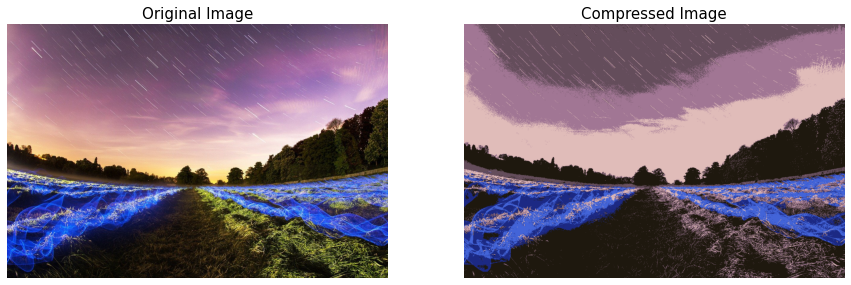

In [33]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

# reading an image
old_image = io.imread('/content/drive/MyDrive/Colab Notebooks/image_sample/326kb.jpeg')

# preprocessing
rows, cols = old_image.shape[0], old_image.shape[1]
image = old_image.reshape(rows * cols, 3)

# Modelling
Kmeans = KMeans(n_clusters = 6)
Kmeans.fit(image)

# getting centers and labels
centers = np.asarray(Kmeans.cluster_centers_, dtype=np.uint8)
labels = np.asarray(Kmeans.labels_, dtype = np.uint8)
labels = np.reshape(labels, (rows, cols))
labels = np.reshape(labels, (rows, cols))

# reconstructing the image
newImage = np.zeros((rows, cols, 3), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center
            newImage[i, j, :] = centers[labels[i, j], :]

io.imsave('/content/drive/MyDrive/Colab Notebooks/image_sample/new326kb.png' + '-compressed.png', newImage)

# Plotting
fig = plt.figure(figsize=[15, 15])
ax1 = fig.add_subplot(121)
ax1.imshow(old_image)
ax1.set_title('Original Image', fontdict={'fontsize':15})
ax1.axis('off')
ax2 = fig.add_subplot(122)
ax2.imshow(newImage)
ax2.set_title('Compressed Image', fontdict={'fontsize':15})
ax2.axis('off')
plt.show()